In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the CSV file
df = pd.read_csv("co2_pcap_cons.csv")

print(df.head())

# Make sure 'country' is a column
df_reset = df.reset_index() if 'country' not in df.columns else df.copy()

# Convert year to numeric
df_reset['1900'] = pd.to_numeric(df_reset['1900'], errors='coerce')


       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
1       Angola  0.009  0.009  0.009  0.009  0.009  0.009  0.010  0.010  0.010   
2      Albania  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3      Andorra  0.333  0.335  0.337  0.340  0.342  0.345  0.347  0.350  0.352   
4          UAE  0.063  0.063  0.064  0.064  0.064  0.064  0.065  0.065  0.065   

   ...  2013    2014    2015    2016    2017    2018    2019    2020    2021  \
0  ...  0.28   0.253   0.262   0.245   0.247   0.254   0.261   0.261   0.279   
1  ...  1.28   1.640   1.220   1.180   1.150   1.120   1.150   1.120   1.200   
2  ...  2.27   2.250   2.040   2.010   2.130   2.080   2.050   2.000   2.120   
3  ...   5.9   5.830   5.970   6.070   6.270   6.120   6.060   5.630   5.970   
4  ...    27  26.800  27.000  26.700  23.900  23.500  21.200  19.700  20.700   

     2022  
0   0.284  
1   1.23

### Lists of Industrialized vs. Developing countries every 50 years

In [3]:
all_countries = df_reset['country'].tolist()

industrialized_1800 = ['UK']
industrialized_1850 = ['Belgium', 'France', 'UK']
industrialized_1900 = ['Austria', 'Belgium', 'Denmark', 'France', 'Germany', 'Italy', 
                       'Japan', 'Netherlands', 'Sweden', 'Switzerland', 'UK', 'USA']
industrialized_1950 = ['France', 'Germany', 'Belgium', 'Netherlands', 'Canada', 'Japan', 'Australia', 'Sweden',
                       'Switzerland', 'Denmark', 'Norway', 'Italy', 'Austria', 'Finland', 'New Zealand', 'UK', 'USA']

developing_1800 = [c for c in all_countries if c not in industrialized_1800]
developing_1850 = [c for c in all_countries if c not in industrialized_1850]
developing_1900 = [c for c in all_countries if c not in industrialized_1900]
developing_1950 = [c for c in all_countries if c not in industrialized_1950]

# For the year 2000 and 2022, countries are classified as: Advanced Industrial, Emerging Industrial, NIC and Developing
classification = pd.read_csv("classification_2000_2022.csv")
df_merged = pd.merge(df, classification, how='left', left_on='country', right_on='Country')

#2000
advanced_2000 = df_merged[df_merged['Classification_2000'] == 'Advanced Industrial']['Country'].tolist()
nics_2000 = df_merged[df_merged['Classification_2000'] == 'NIC']['Country'].tolist()
emerging_2000 = df_merged[df_merged['Classification_2000'] == 'Emerging Industrial']['Country'].tolist()
developing_2000 = df_merged[df_merged['Classification_2000'] == 'Developing']['Country'].tolist()

#2022
advanced_2022 = df_merged[df_merged['Classification_2022'] == 'Advanced Industrial']['Country'].tolist()
nics_2022 = df_merged[df_merged['Classification_2022'] == 'NIC']['Country'].tolist()
emerging_2022 = df_merged[df_merged['Classification_2022'] == 'Emerging Industrial']['Country'].tolist()
developing_2022 = df_merged[df_merged['Classification_2022'] == 'Developing']['Country'].tolist()

print(len(nics_2000))
print(len(nics_2022))
print(len(developing_2022))
print(developing_2022)


6
9
145
['Afghanistan', 'Angola', 'Albania', 'Andorra', 'UAE', 'Armenia', 'Antigua and Barbuda', 'Azerbaijan', 'Burundi', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Djibouti', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Ethiopia', 'Fiji', 'Micronesia, Fed. Sts.', 'Gabon', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 'Kiribati', 'St. Kitts and Nevis', 'Kuwait', 'Lao', 'Lebanon', 'Liberia', 'Libya', 'St. Lucia', 'Liechtenstein', 'Sri Lanka', 'Lesotho', 'Latvia', 'Morocc

### Emissions

In [4]:
advanced_emissions_1800 = df_reset[df_reset['country'].isin(industrialized_1800)]['1800'].dropna().values
developing_emissions_1800 = df_reset[df_reset['country'].isin(developing_1800)]['1800'].dropna().values

advanced_emissions_1850 = df_reset[df_reset['country'].isin(industrialized_1850)]['1850'].dropna().values
developing_emissions_1850 = df_reset[df_reset['country'].isin(developing_1850)]['1850'].dropna().values

advanced_emissions_1900 = df_reset[df_reset['country'].isin(industrialized_1900)]['1900'].dropna().values
developing_emissions_1900 = df_reset[df_reset['country'].isin(developing_1900)]['1900'].dropna().values

print(advanced_emissions_1900)

advanced_emissions_1950 = df_reset[df_reset['country'].isin(industrialized_1950)]['1950'].dropna().values
developing_emissions_1950 = df_reset[df_reset['country'].isin(developing_1950)]['1950'].dropna().values

advanced_emissions_2000 = df_reset[df_reset['country'].isin(advanced_2000)]['2000'].dropna().values
nics_emissions_2000 = df_reset[df_reset['country'].isin(nics_2000)]['2000'].dropna().values
emerging_emissions_2000 = df_reset[df_reset['country'].isin(emerging_2000)]['2000'].dropna().values
developing_emissions_2000 = df_reset[df_reset['country'].isin(developing_2000)]['2000'].dropna().values

advanced_emissions_2022 = df_reset[df_reset['country'].isin(advanced_2022)]['2022'].dropna().values
nics_emissions_2022 = df_reset[df_reset['country'].isin(nics_2022)]['2022'].dropna().values
emerging_emissions_2022 = df_reset[df_reset['country'].isin(emerging_2022)]['2022'].dropna().values
developing_emissions_2022 = df_reset[df_reset['country'].isin(developing_2022)]['2022'].dropna().values


[ 4.63   7.4    1.73   5.93   2.01   3.23  10.1    0.416  0.444  2.86
  1.79   8.42 ]


## The bootstrap method

In [5]:
ci = 0.95
B = 1000

def bootstrap_mean(data, B=B, ci=ci):

    data = np.array(data)
    bootstrap_means = []

    for _ in range(B):
        indices = np.random.randint(0, len(data), size=len(data))
        sample = data[indices]
        bootstrap_means.append(np.mean(sample))

    lower = np.percentile(bootstrap_means, (1 - ci) / 2 * 100)
    upper = np.percentile(bootstrap_means, (1 + ci) / 2 * 100)
    mean_estimate = np.mean(bootstrap_means)

    return mean_estimate, (lower, upper), bootstrap_means

def histogram(mean, lower, upper, bootstrap_means, ci=ci, label=False):

    plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
    plt.axvline(mean, color='red', linestyle='--', label=f"Mean: {mean:.2f}")
    plt.axvline(lower, color='blue', linestyle='--', label=f"{int(ci*100)}% CI lower: {lower:.2f}")
    plt.axvline(upper, color='blue', linestyle='--', label=f"{int(ci*100)}% CI upper: {upper:.2f}")
    plt.title(f"Bootstrap Distribution" + (f" ({label})" if label else ""))
    plt.xlabel("Mean CO₂ Emissions")
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout() #Uncomment these to plot data from different categories together
    plt.show()

### 1800s

Number of advanced countries 1800:  1
Number of developing countries 1800:  193


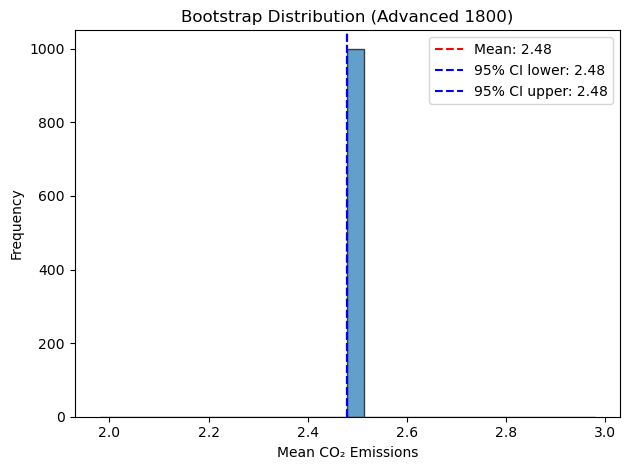

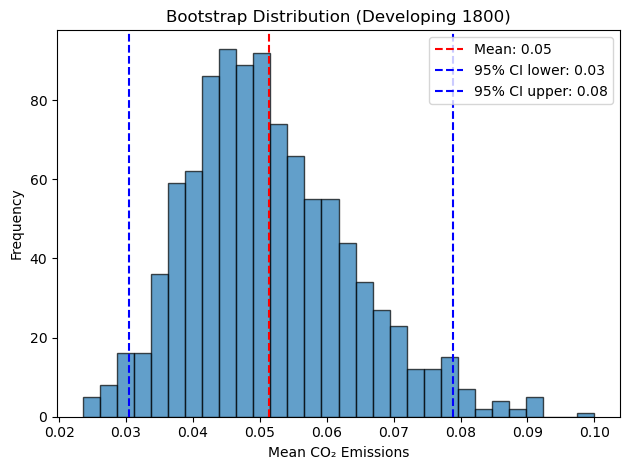

In [6]:
print("Number of advanced countries 1800: ", len(advanced_emissions_1800))
print("Number of developing countries 1800: ", len(developing_emissions_1800))

adv_1800_mean, adv_1800_ci, adv_bs_means_1800 = bootstrap_mean(advanced_emissions_1800)
dev_1800_mean, dev_1800_ci, dev_bs_means_1800 = bootstrap_mean(developing_emissions_1800)

histogram(adv_1800_mean, adv_1800_ci[0], adv_1800_ci[1], adv_bs_means_1800, label="Advanced 1800") #Only the UK, not necessary
histogram(dev_1800_mean, dev_1800_ci[0], dev_1800_ci[1], dev_bs_means_1800, label="Developing 1800")

#print("Advanced Industrial (1950):")
#print(f"Mean = {adv_1950_mean:.2f}, 95% CI = ({adv_1950_ci[0]:.2f}, {adv_1950_ci[1]:.2f})")

#print("\nDeveloping (1950):")
#print(f"Mean = {dev_1950_mean:.2f}, 95% CI = ({dev_1950_ci[0]:.2f}, {dev_1950_ci[1]:.2f})")

### 1850

Number of advanced countries 1850:  3
Number of developing countries 1850:  191


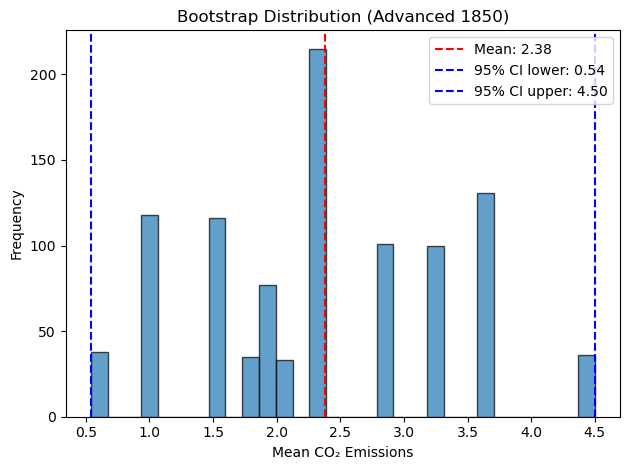

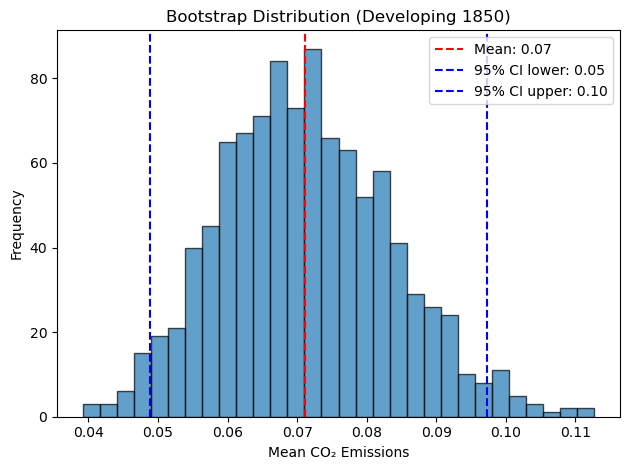

In [11]:
print("Number of advanced countries 1850: ", len(advanced_emissions_1850))
print("Number of developing countries 1850: ", len(developing_emissions_1850))

adv_1850_mean, adv_1850_ci, adv_bs_means_1850 = bootstrap_mean(advanced_emissions_1850)
dev_1850_mean, dev_1850_ci, dev_bs_means_1850 = bootstrap_mean(developing_emissions_1850)

histogram(adv_1850_mean, adv_1850_ci[0], adv_1850_ci[1], adv_bs_means_1850, label="Advanced 1850")
histogram(dev_1850_mean, dev_1850_ci[0], dev_1850_ci[1], dev_bs_means_1850, label="Developing 1850")

### 1900

Number of advanced countries 1900:  12
Number of developing countries 1900:  182


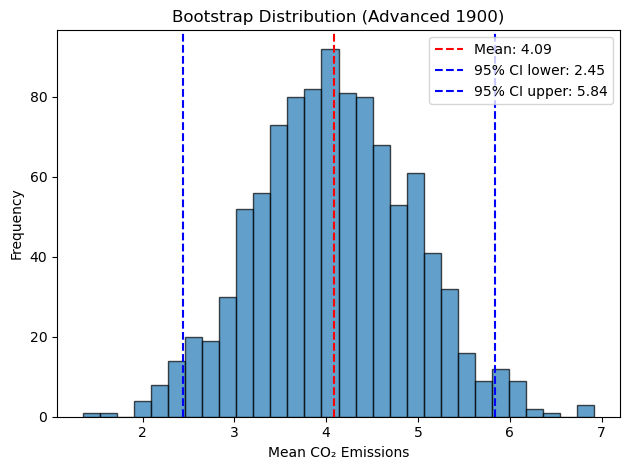

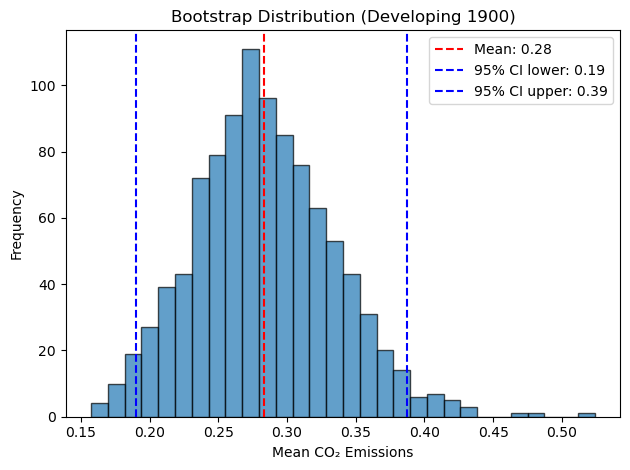

In [72]:
print("Number of advanced countries 1900: ", len(advanced_emissions_1900))
print("Number of developing countries 1900: ", len(developing_emissions_1900))

adv_1900_mean, adv_1900_ci, adv_bs_means_1900 = bootstrap_mean(advanced_emissions_1900)
dev_1900_mean, dev_1900_ci, dev_bs_means_1900 = bootstrap_mean(developing_emissions_1900)

histogram(adv_1900_mean, adv_1900_ci[0], adv_1900_ci[1], adv_bs_means_1900, label="Advanced 1900")
histogram(dev_1900_mean, dev_1900_ci[0], dev_1900_ci[1], dev_bs_means_1900, label="Developing 1900")

### 1950

Number of advanced countries 1950:  17
Number of developing countries 1950:  177


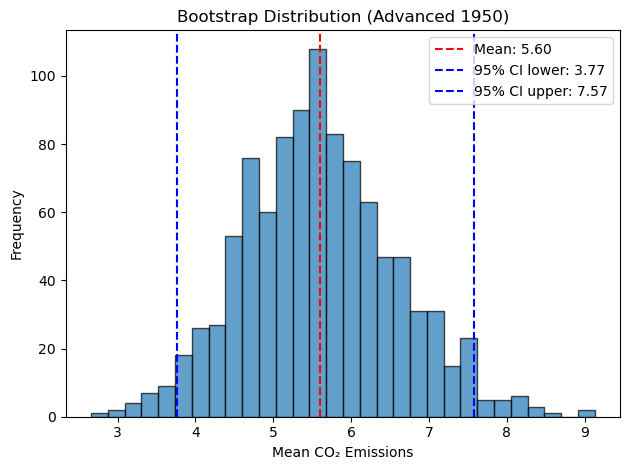

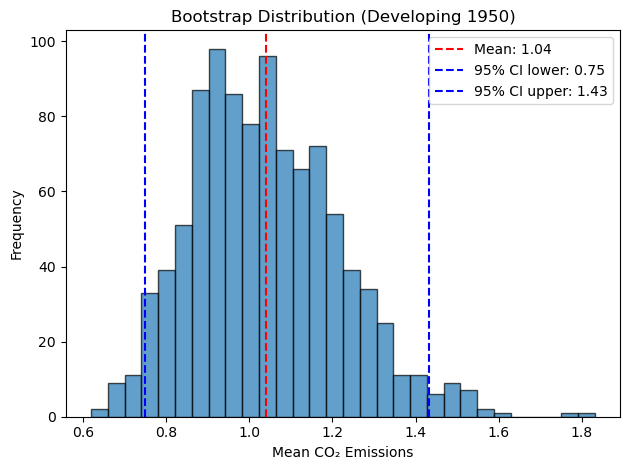

In [71]:
print("Number of advanced countries 1950: ", len(advanced_emissions_1950))
print("Number of developing countries 1950: ", len(developing_emissions_1950))

adv_1950_mean, adv_1950_ci, adv_bs_means_1950 = bootstrap_mean(advanced_emissions_1950)
dev_1950_mean, dev_1950_ci, dev_bs_means_1950 = bootstrap_mean(developing_emissions_1950)

histogram(adv_1950_mean, adv_1950_ci[0], adv_1950_ci[1], adv_bs_means_1950, label="Advanced 1950")
histogram(dev_1950_mean, dev_1950_ci[0], dev_1950_ci[1], dev_bs_means_1950, label="Developing 1950")

### 2000

Number of advanced countries 2000:  20
Number of NICs 2000:  6
Number of emerging countries 2000:  10
Number of developing countries 2000:  158


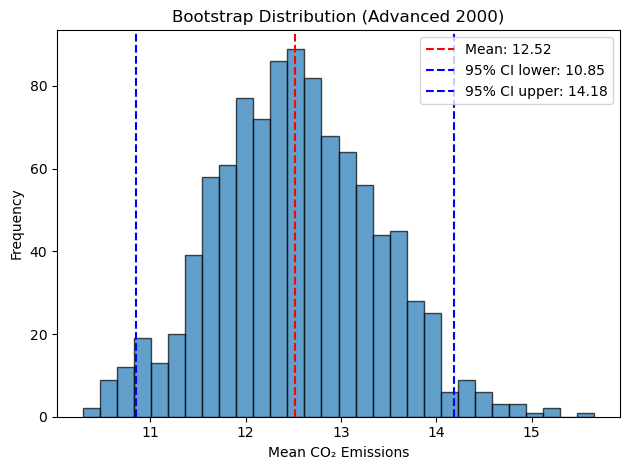

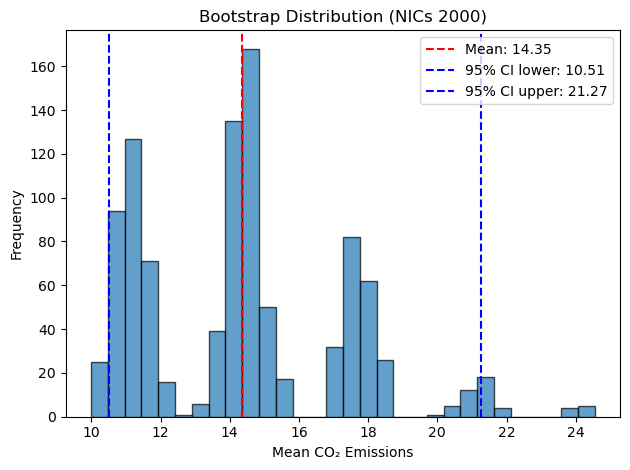

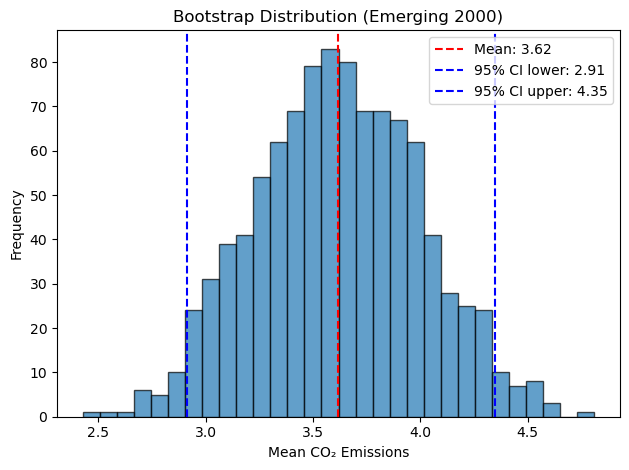

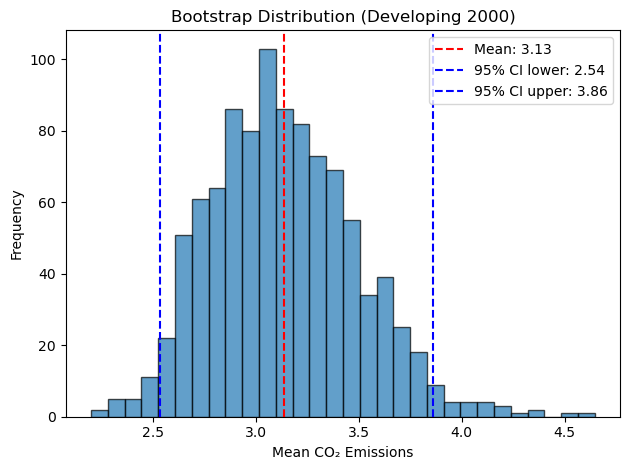

In [70]:
print("Number of advanced countries 2000: ", len(advanced_emissions_2000))
print("Number of NICs 2000: ", len(nics_emissions_2000))
print("Number of emerging countries 2000: ", len(emerging_emissions_2000))
print("Number of developing countries 2000: ", len(developing_emissions_2000))

adv_2000_mean, adv_2000_ci, adv_bs_means_2000 = bootstrap_mean(advanced_emissions_2000)
nics_2000_mean, nics_2000_ci, nics_bs_means_2000 = bootstrap_mean(nics_emissions_2000)
emg_2000_mean, emg_2000_ci, emg_bs_means_2000 = bootstrap_mean(emerging_emissions_2000)
dev_2000_mean, dev_2000_ci, dev_bs_means_2000 = bootstrap_mean(developing_emissions_2000)

histogram(adv_2000_mean, adv_2000_ci[0], adv_2000_ci[1], adv_bs_means_2000, label="Advanced 2000")
histogram(nics_2000_mean, nics_2000_ci[0], nics_2000_ci[1], nics_bs_means_2000, label="NICs 2000")
histogram(emg_2000_mean, emg_2000_ci[0], emg_2000_ci[1], emg_bs_means_2000, label="Emerging 2000")
histogram(dev_2000_mean, dev_2000_ci[0], dev_2000_ci[1], dev_bs_means_2000, label="Developing 2000")

### 2022

Number of advanced countries 2022:  25
Number of NICs 2022:  9
Number of emerging countries 2022:  15
Number of developing countries 2022:  145


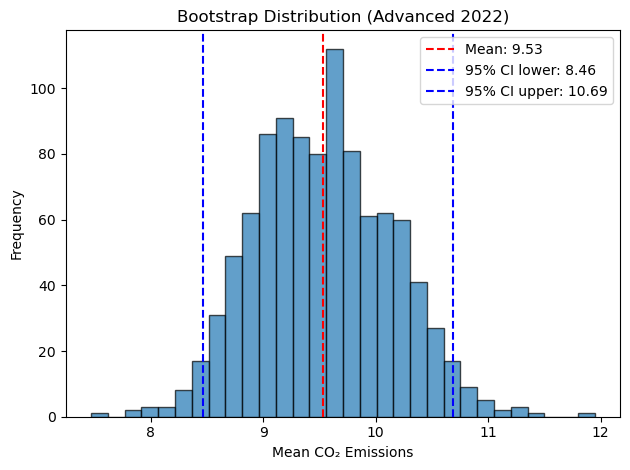

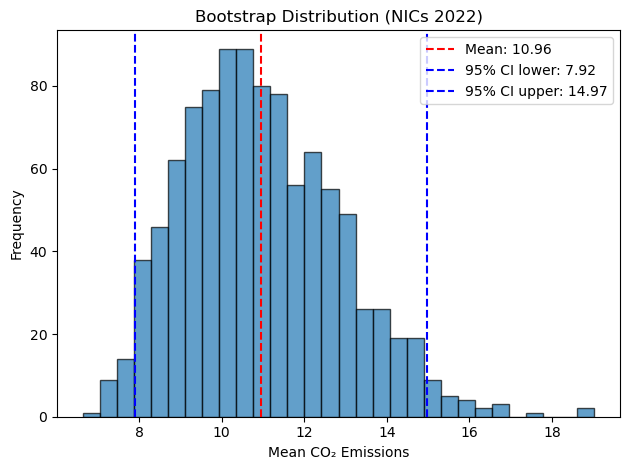

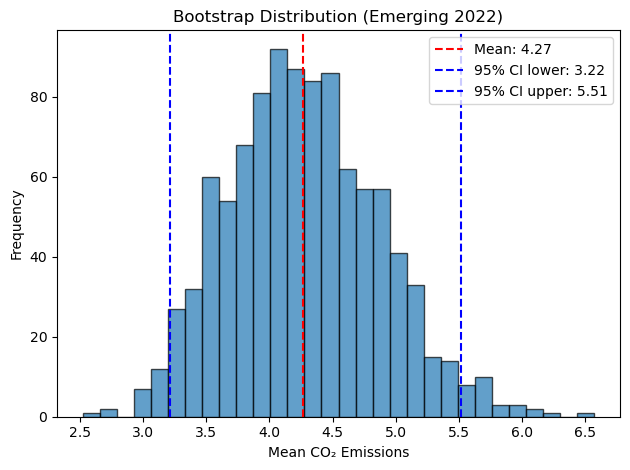

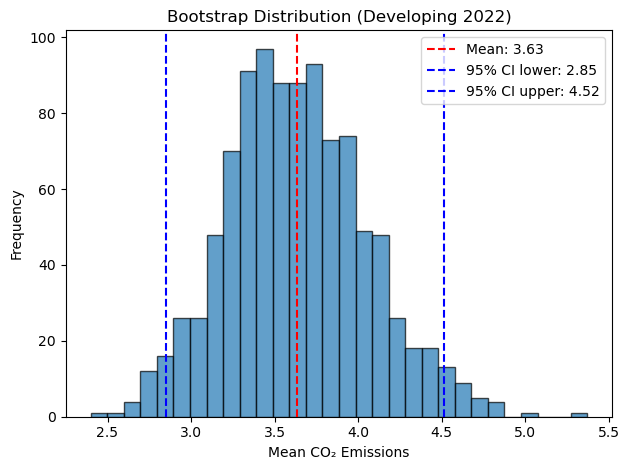

In [69]:
print("Number of advanced countries 2022: ", len(advanced_emissions_2022))
print("Number of NICs 2022: ", len(nics_emissions_2022))
print("Number of emerging countries 2022: ", len(emerging_emissions_2022))
print("Number of developing countries 2022: ", len(developing_emissions_2022))

adv_2022_mean, adv_2022_ci, adv_bs_means_2022 = bootstrap_mean(advanced_emissions_2022)
nics_2022_mean, nics_2022_ci, nics_bs_means_2022 = bootstrap_mean(nics_emissions_2022)
emg_2022_mean, emg_2022_ci, emg_bs_means_2022 = bootstrap_mean(emerging_emissions_2022)
dev_2022_mean, dev_2022_ci, dev_bs_means_2022 = bootstrap_mean(developing_emissions_2022)

histogram(adv_2022_mean, adv_2022_ci[0], adv_2022_ci[1], adv_bs_means_2022, label="Advanced 2022")
histogram(nics_2022_mean, nics_2022_ci[0], nics_2022_ci[1], nics_bs_means_2022, label="NICs 2022")
histogram(emg_2022_mean, emg_2022_ci[0], emg_2022_ci[1], emg_bs_means_2022, label="Emerging 2022")
histogram(dev_2022_mean, dev_2022_ci[0], dev_2022_ci[1], dev_bs_means_2022, label="Developing 2022")

### Progression

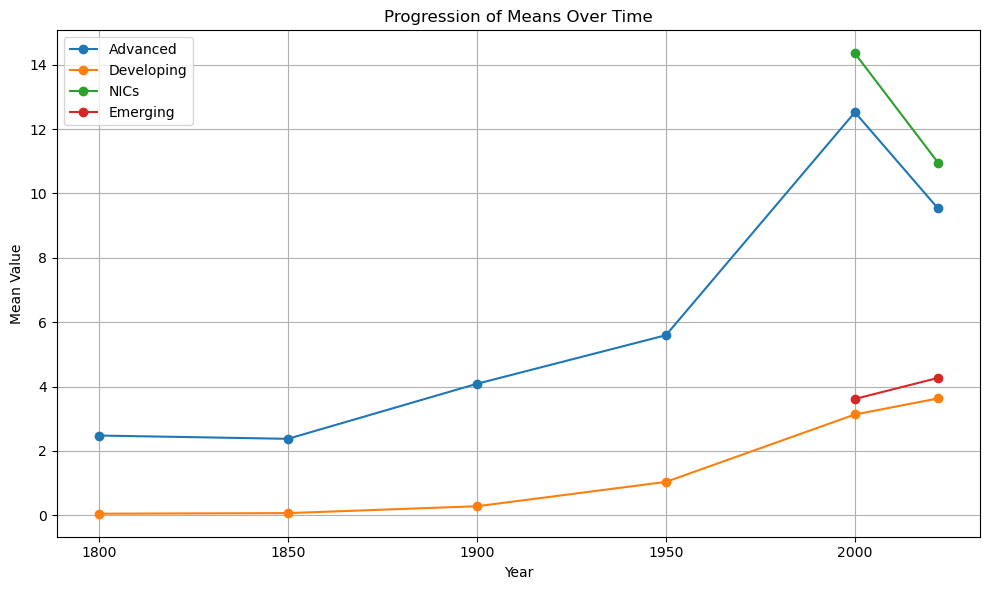

In [96]:
adv_means = [adv_1800_mean, adv_1850_mean, adv_1900_mean, adv_1950_mean, adv_2000_mean, adv_2022_mean]
dev_means = [dev_1800_mean, dev_1850_mean, dev_1900_mean, dev_1950_mean, dev_2000_mean, dev_2022_mean]
nics_means = [nics_2000_mean, nics_2022_mean]
emg_means = [emg_2000_mean, emg_2022_mean]

# Define the years
years_1800s = [1800, 1850, 1900, 1950]
years_2000s = [2000, 2022]

# Combine years and values for advanced and developing countries
adv_years = years_1800s + years_2000s
dev_years = years_1800s + years_2000s

# Create the plot
plt.figure(figsize=(10, 6))

plt.plot(adv_years, adv_means, marker='o', label='Advanced')
plt.plot(dev_years, dev_means, marker='o', label='Developing')
plt.plot(years_2000s, nics_means, marker='o', label='NICs')
plt.plot(years_2000s, emg_means, marker='o', label='Emerging')

plt.title('Progression of Means Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.xticks(np.arange(1800, 2025, 50))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Mean emission for all countries over the years

Index of max value: 180


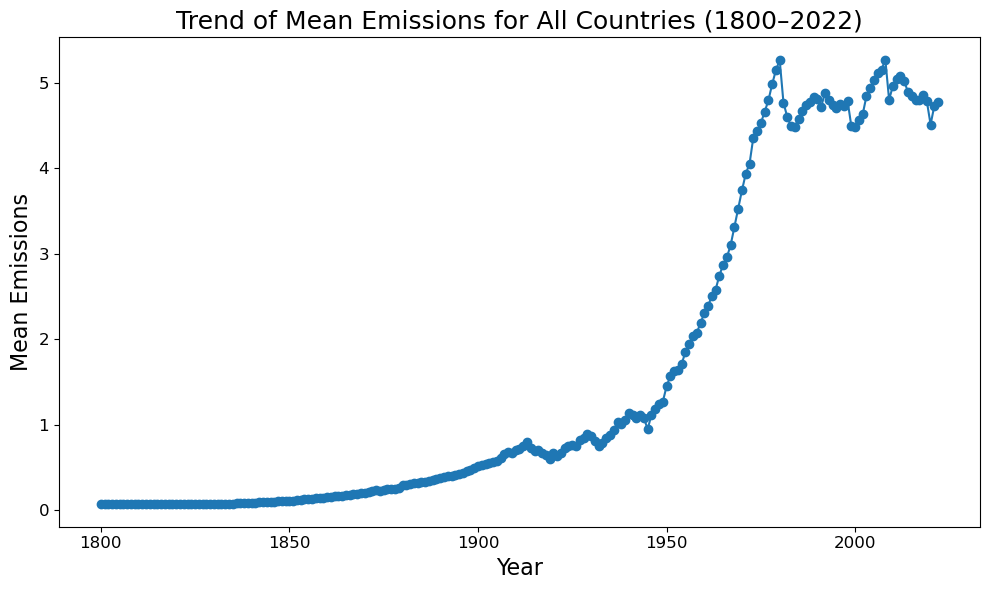

In [12]:
# Extract all year columns (ensure they are strings like '1800', '1850', etc.)
years = [col for col in df_reset.columns if col.isdigit()]

# Convert years to integers for plotting
years_int = [int(year) for year in years]

# Compute mean emissions for each year across all countries
mean_emissions = []

for year in years:
    numeric_col = pd.to_numeric(df_reset[year], errors='coerce')
    mean_value = numeric_col.dropna().mean()
    mean_emissions.append(mean_value)

argmax_index = np.argmax(mean_emissions[:200])
print("Index of max value:", argmax_index)

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(years_int, mean_emissions, marker='o')
plt.title('Trend of Mean Emissions for All Countries (1800–2022)', fontsize = 18)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Mean Emissions', fontsize=16)
plt.tick_params(axis='x', labelsize=12)
plt.tick_params(axis='y', labelsize=12) 
plt.grid(False)
plt.tight_layout()
plt.show()


['Austria', 'Belgium', 'Denmark', 'France', 'Germany', 'Italy', 'Japan', 'Netherlands', 'Sweden', 'Switzerland', 'UK', 'USA']
['Afghanistan', 'Angola', 'Albania', 'Andorra', 'UAE', 'Armenia', 'Antigua and Barbuda', 'Azerbaijan', 'Burundi', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Central African Republic', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Djibouti', 'Dominica', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Ethiopia', 'Fiji', 'Micronesia, Fed. Sts.', 'Gabon', 'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Croatia', 'Haiti', 'Hungary', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Cambodia', 'Kiribati', 'St. Kitts and Nevis', '

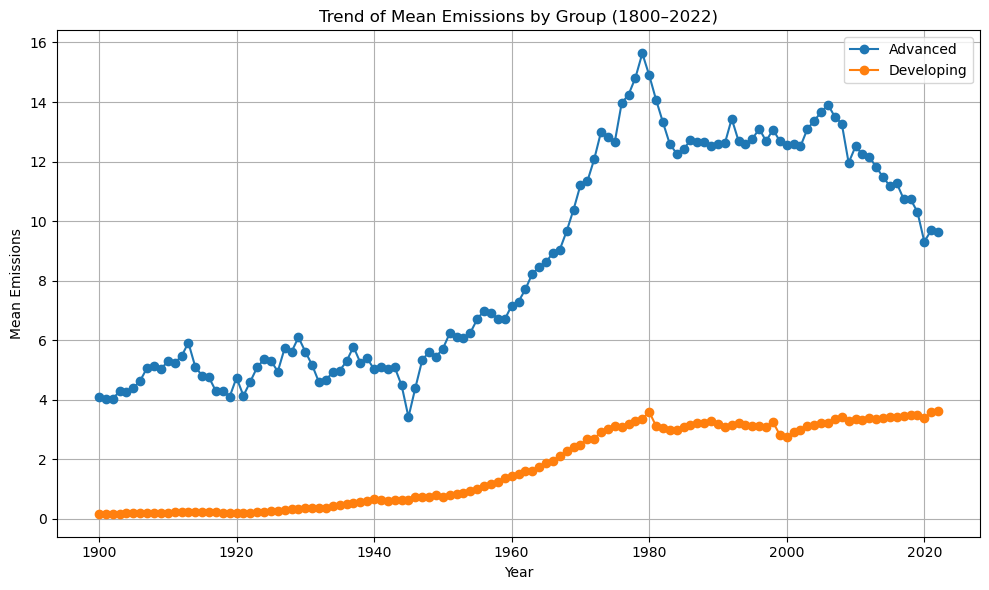

In [86]:

# Extract all year columns (assuming they are strings like '1800', '1850', etc.)
years = [col for col in df_reset.columns if col.isdigit()]
years_int = [int(year) for year in years]

# Function to compute mean emissions for a given country group
def compute_group_means(country_list):
    group_means = []
    for year in years:
        subset = df_reset[df_reset['country'].isin(country_list)]
        numeric_col = pd.to_numeric(subset[year], errors='coerce')
        mean_value = numeric_col.dropna().mean()
        group_means.append(mean_value)
    return group_means

# Compute means for each group
advanced_means = compute_group_means(industrialized_1900)
#nics_means = compute_group_means(nics_2022)
#emerging_means = compute_group_means(emerging_2022)
developing_means = compute_group_means(developing_2022)

print(industrialized_1900)
print(developing_2022)

# Plot all trends
plt.figure(figsize=(10, 6))
plt.plot(years_int[100:], advanced_means[100:], marker='o', label='Advanced')
#plt.plot(years_int, nics_means, marker='o', label='NICs')
#plt.plot(years_int, emerging_means, marker='o', label='Emerging')
plt.plot(years_int[100:], developing_means[100:], marker='o', label='Developing')

plt.title('Trend of Mean Emissions by Group (1800–2022)')
plt.xlabel('Year')
plt.ylabel('Mean Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [93]:
year = '2022'

# Convert the column to numeric (to clean up any text)
df_reset[year] = pd.to_numeric(df_reset[year], errors='coerce')

# Get top 5 countries by emissions per capita in that year
top5 = df_reset[['country', year]].sort_values(by=year, ascending=False).head(5)

print(top5)

       country  2022
145      Qatar  27.3
152  Singapore  25.4
25      Brunei  24.5
95      Kuwait  24.0
4          UAE  21.1


### Emissions from China, India and the US

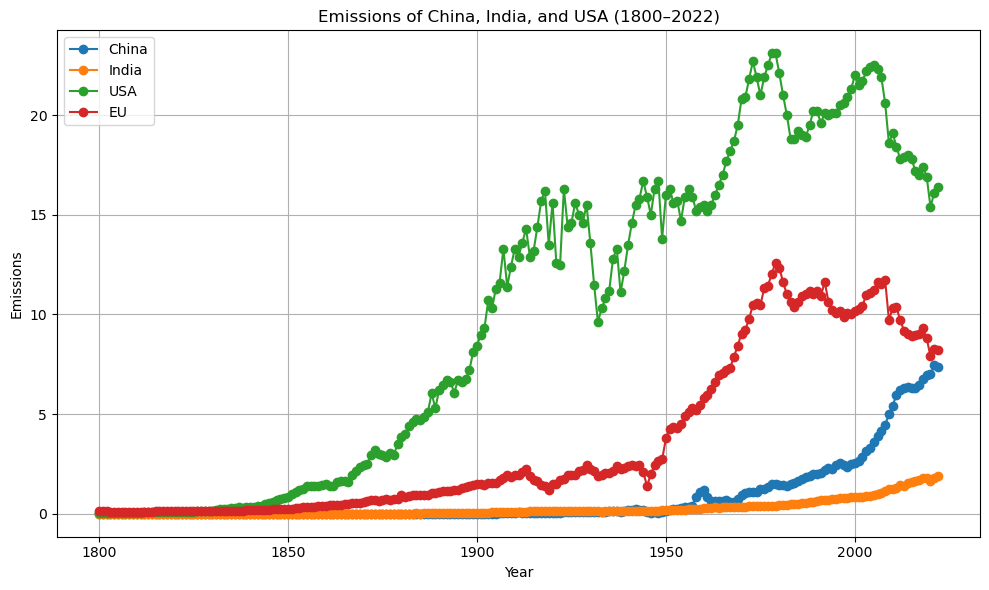

In [106]:
# Extract all year columns
years = [col for col in df_reset.columns if col.isdigit()]
years_int = [int(year) for year in years]

# Extract emissions directly (single row per country)
china_row = df_reset[df_reset['country'] == 'China']
india_row = df_reset[df_reset['country'] == 'India']
usa_row = df_reset[df_reset['country'] == 'USA']

eu = ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden']
eu_emissions = advanced_means = compute_group_means(eu)

# Convert to numeric (across all years)
china_emissions = pd.to_numeric(china_row[years].values.flatten(), errors='coerce')
india_emissions = pd.to_numeric(india_row[years].values.flatten(), errors='coerce')
usa_emissions = pd.to_numeric(usa_row[years].values.flatten(), errors='coerce')

# Plot all trends
plt.figure(figsize=(10, 6))
plt.plot(years_int, china_emissions, marker='o', label='China')
plt.plot(years_int, india_emissions, marker='o', label='India')
plt.plot(years_int, usa_emissions, marker='o', label='USA')
plt.plot(years_int, eu_emissions, marker='o', label='EU')

plt.title('Emissions of China, India, and USA (1800–2022)')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
